## Constant population, empirical sampling dates

In [1]:
library(phylodyn)
library(ape)
library(timeTreeSim)

In [2]:
set.seed(443556)

In [3]:
dateData.A <- read.csv("../../DATA/SEQUENCES/data_acquisition/serotype_A_SA_metadata_final.csv")
dateData.O <- read.csv("../../DATA/SEQUENCES/data_acquisition/serotype_O_SA_metadata_final.csv")

In [4]:
get_year <- function(x) as.numeric(strsplit(x, "-")[[1]][1])
get_year <- Vectorize(get_year)    

In [5]:
YearsA <- get_year(as.character(dateData.A$date))
YearsO <- get_year(as.character(dateData.O$date))

In [6]:
nrep <- 10

trees_A <- lapply(1:nrep, function(i){
  timeTreeSim::simuTimeTree(coalmodel = "constan", popSize = 10,
                            taxa_times = YearsA,
                            simu_name = "const_Ne10_serotypeA")  
})

trees_O <- lapply(1:nrep, function(i){
  timeTreeSim::simuTimeTree(coalmodel = "constant", popSize = 10,
                            taxa_times = YearsO,
                            simu_name = "const_Ne10_serotypeO")  
})

In [7]:
get_reconstructions_cov <- function(tree){
    out <- list(
        naive = phylodyn::BNPR(data = tree, lengthout = 100, pc_prior = FALSE),
        preferential = phylodyn::BNPR_PS(data = tree, lengthout = 100, pc_prior = FALSE),
        preferential_cov = phylodyn::BNPR_PS(data = tree,
                                         fns = list(f1 = function(t) -t),
                                             lengthout = 100, pc_prior = FALSE, log_fns = FALSE),
        preferential_cov_sq = phylodyn::BNPR_PS(data = tree,
                                         fns = list(f1 = function(t) -t, f2 = function(t) -t*t),
                                             lengthout = 100, pc_prior = FALSE, log_fns = FALSE)
                                             
    ) 
    return(out)
}

In [39]:
traj_fun <- function(t, Ne = 10) return(Ne)
traj_fun <- Vectorize(traj_fun)

In [21]:
plot_reconstructions <- function(recons, times, verbose = FALSE){
    par(mfrow = c(1, 4))
    ymax <- max( c( max(recons$naive$effpop975),
                   max(recons$preferential$effpop975),
                   max(recons$preferential_cov$effpop975) ))
    if(verbose) cat("max y:", ymax, "\n")
    plot_BNPR(recons$naive, traj = traj_fun, xlab = "Time (years)", axlabs = times,
              ylim = c(0.5, ymax),
              main = "Naive")
    plot_BNPR(recons$preferential, traj = traj_fun, xlab = "Time (years)", axlabs = times,
              ylim = c(0.5, ymax),
              main = "{gamma(t)}")
    plot_BNPR(recons$preferential_cov, traj = traj_fun, xlab = "Time (years)", axlabs = times,
              ylim = c(0.5, ymax),
              main = "{gamma(t), -t}")
    plot_BNPR(recons$preferential_cov_sq, traj = traj_fun, xlab = "Time (years)", axlabs = times,
              ylim = c(0.5, ymax),
              main = "{gamma(t), -t, -t^2}")    
}

In [41]:
tt.A <- list(
    x = c(0, 20, 40, 60),
    labs = as.character(2013 - c(0, 20, 40, 60))
)
tt.O <- list(
    x = c(0, 20, 40, 60),
    labs = as.character(2011 - c(0, 20, 40, 60))
)

In [25]:
reconstructions.A <- lapply(trees_A, get_reconstructions_cov)

In [12]:
reconstructions.O <- lapply(trees_O, get_reconstructions_cov)

In [42]:
options(repr.plot.width = 10, repr.plot.height = 5)

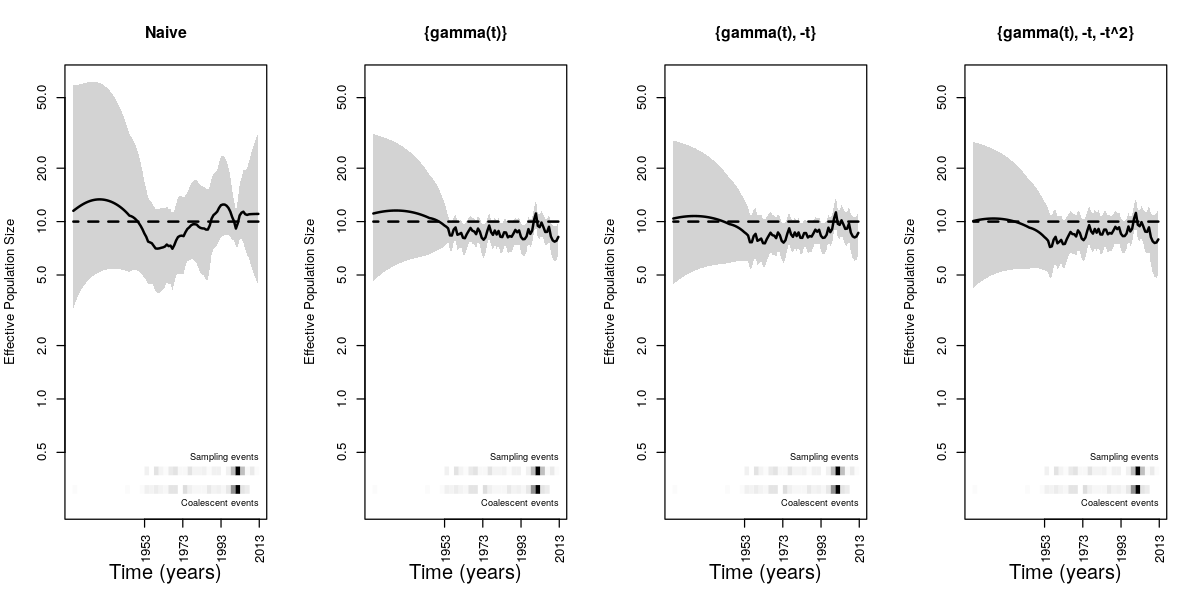

In [43]:
plot_reconstructions(reconstructions.A[[2]], times = tt.A)

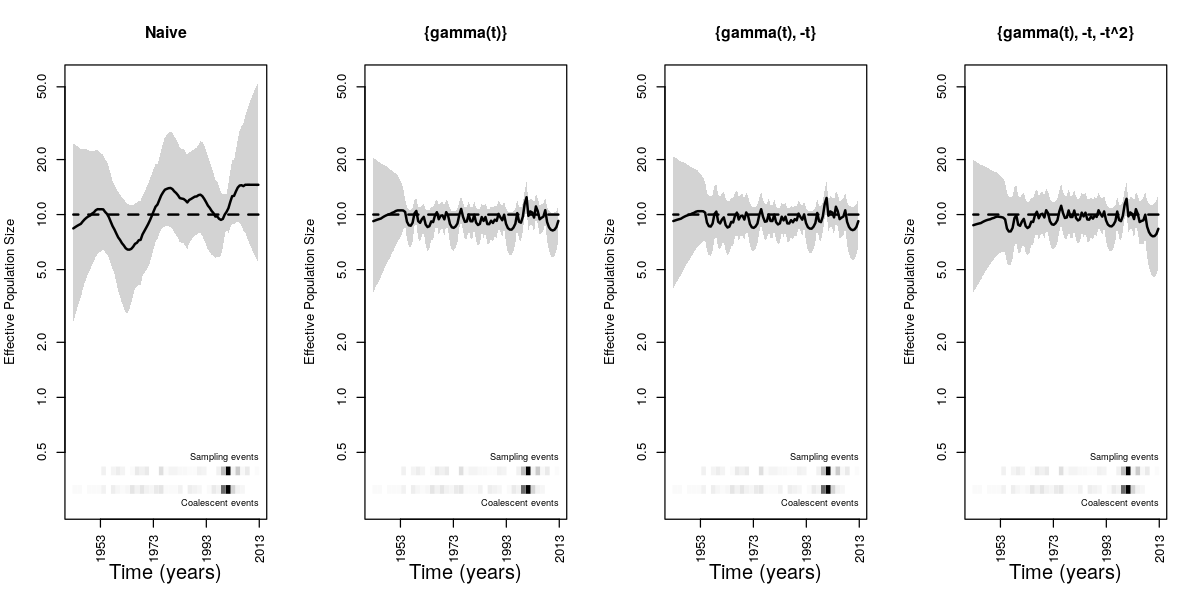

In [44]:
plot_reconstructions(reconstructions.A[[3]], times = tt.A)

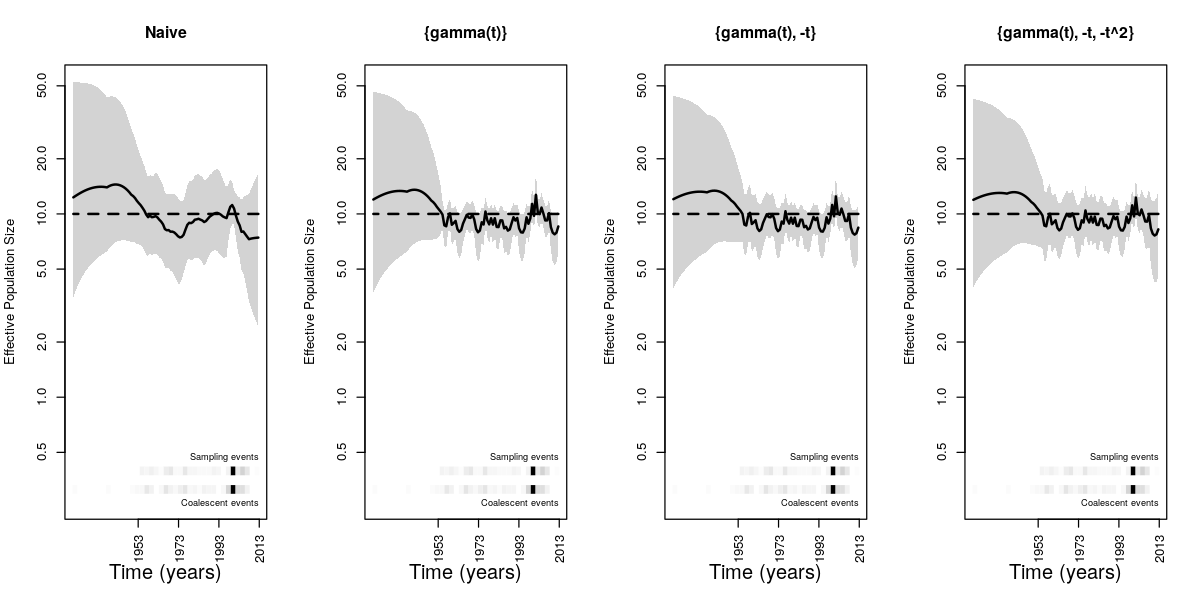

In [45]:
plot_reconstructions(reconstructions.A[[4]], times = tt.A)

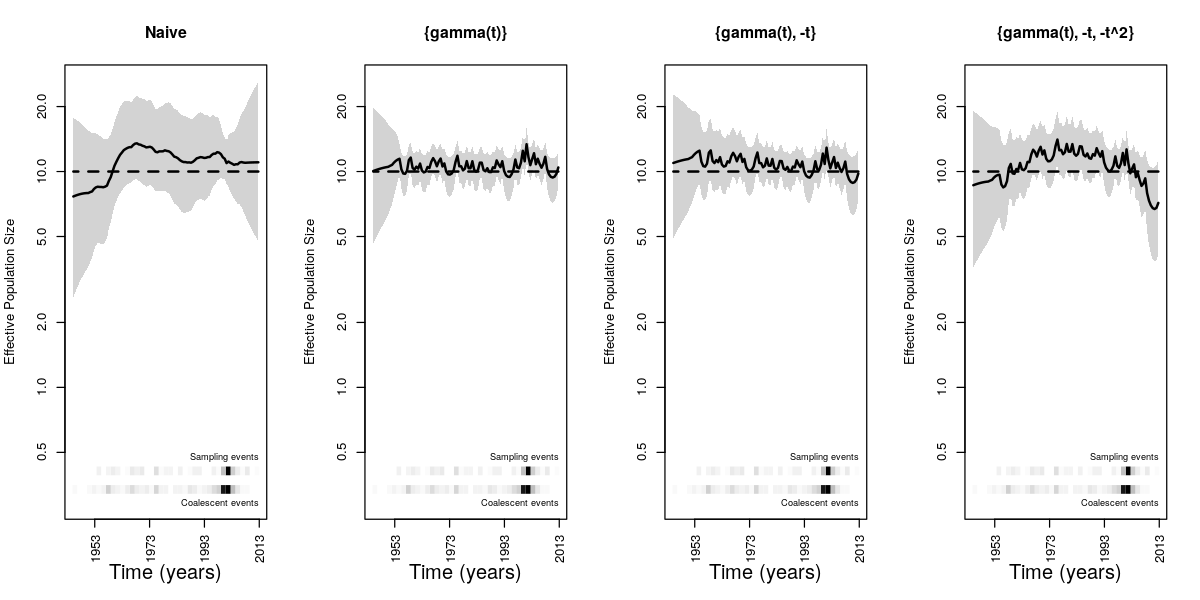

In [46]:
plot_reconstructions(reconstructions.A[[5]], times = tt.A)

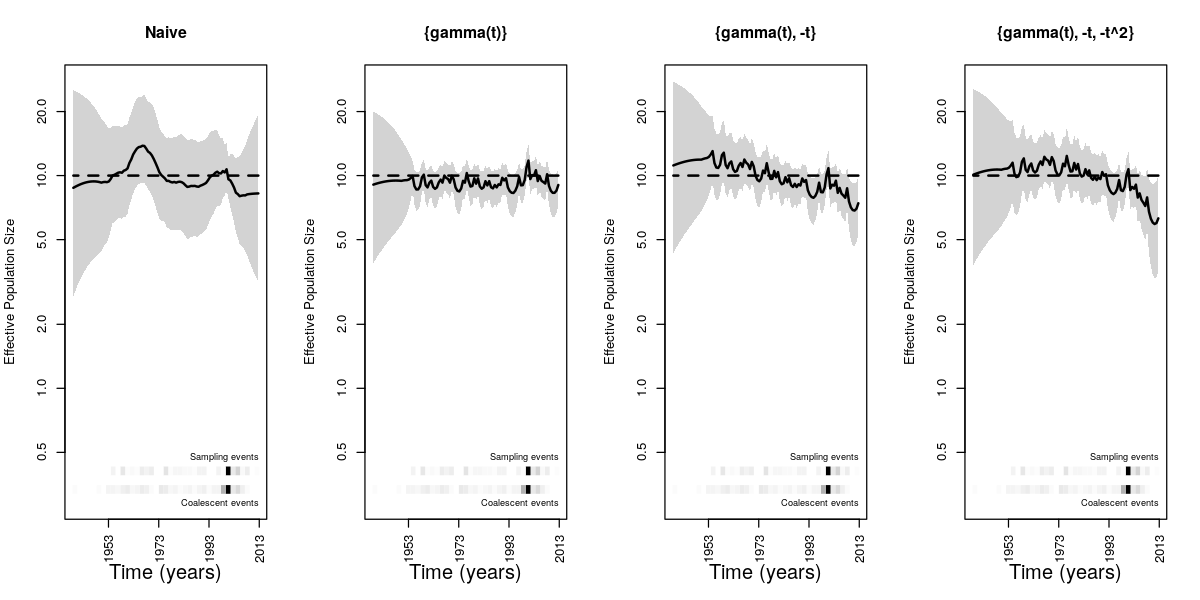

In [47]:
plot_reconstructions(reconstructions.A[[6]], times = tt.A)

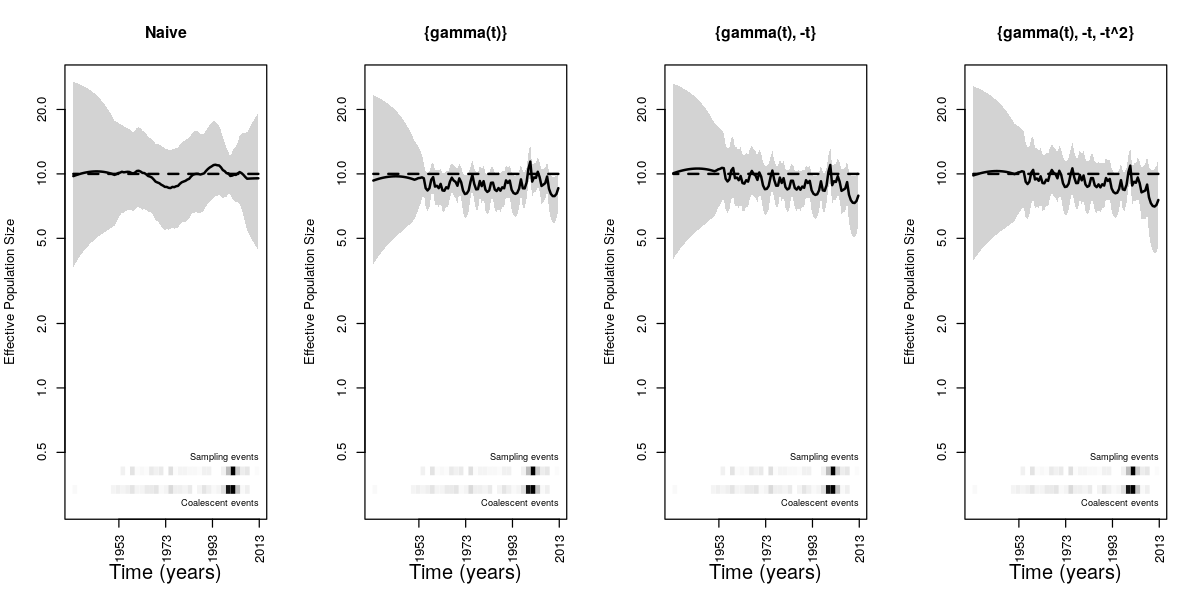

In [48]:
plot_reconstructions(reconstructions.A[[7]], times = tt.A)

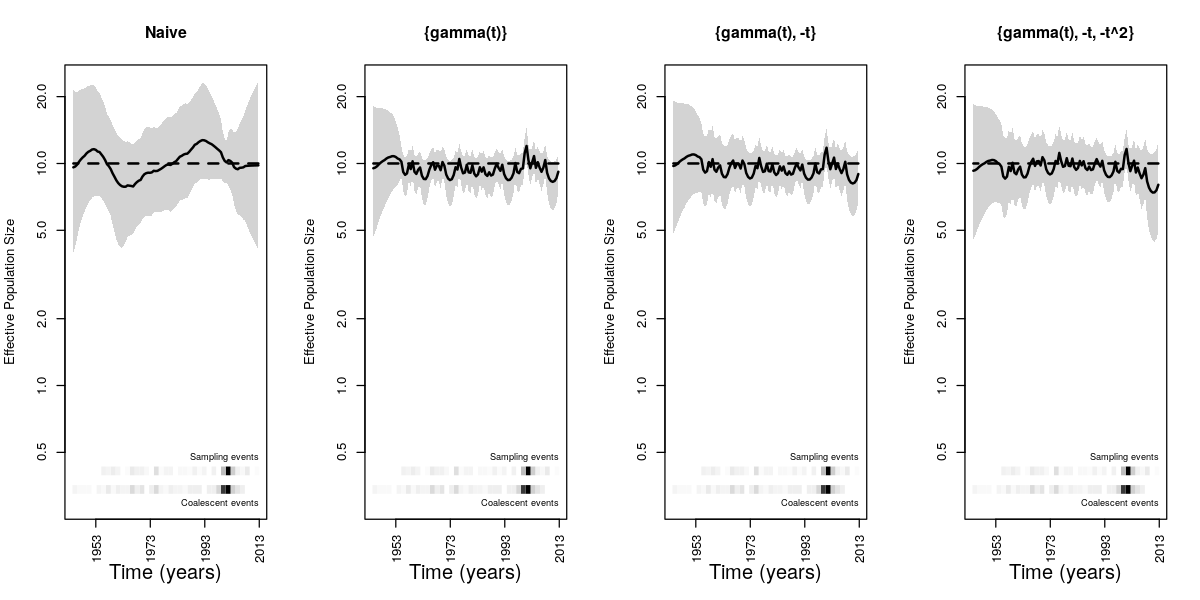

In [49]:
plot_reconstructions(reconstructions.A[[8]], times = tt.A)

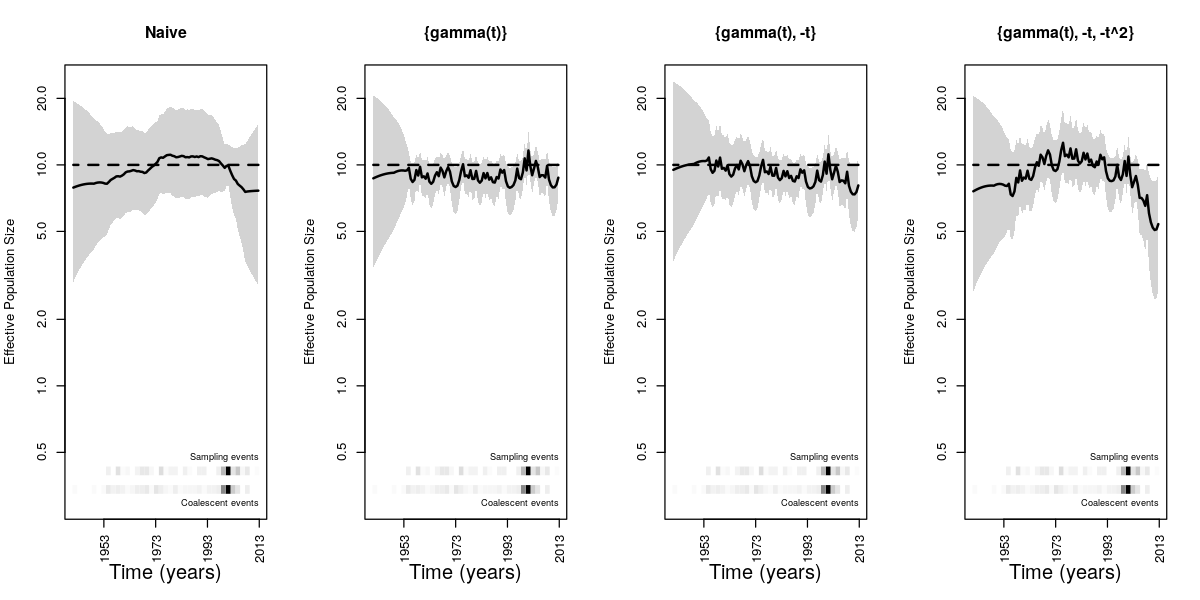

In [50]:
plot_reconstructions(reconstructions.A[[9]], times = tt.A)

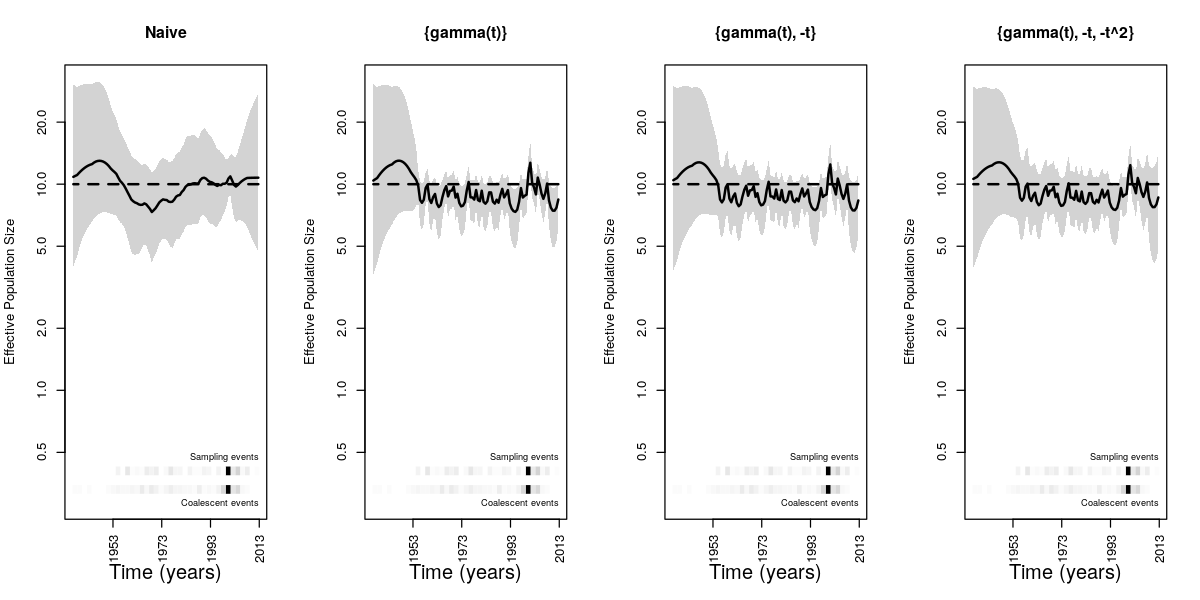

In [51]:
plot_reconstructions(reconstructions.A[[10]], times = tt.A)

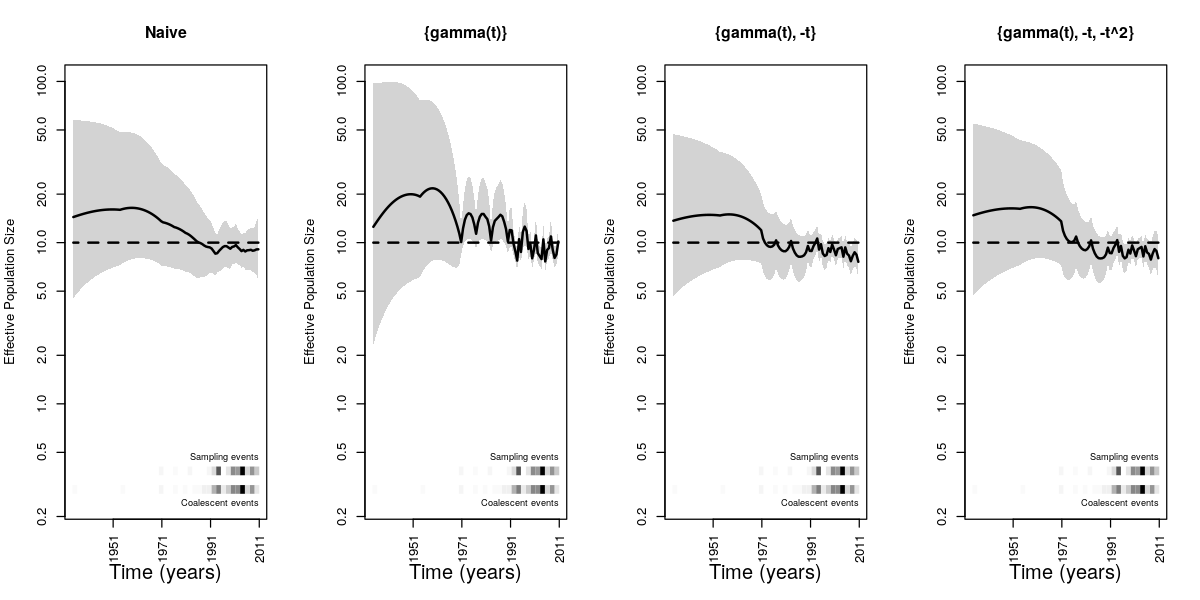

In [52]:
plot_reconstructions(reconstructions.O[[1]], times = tt.O)

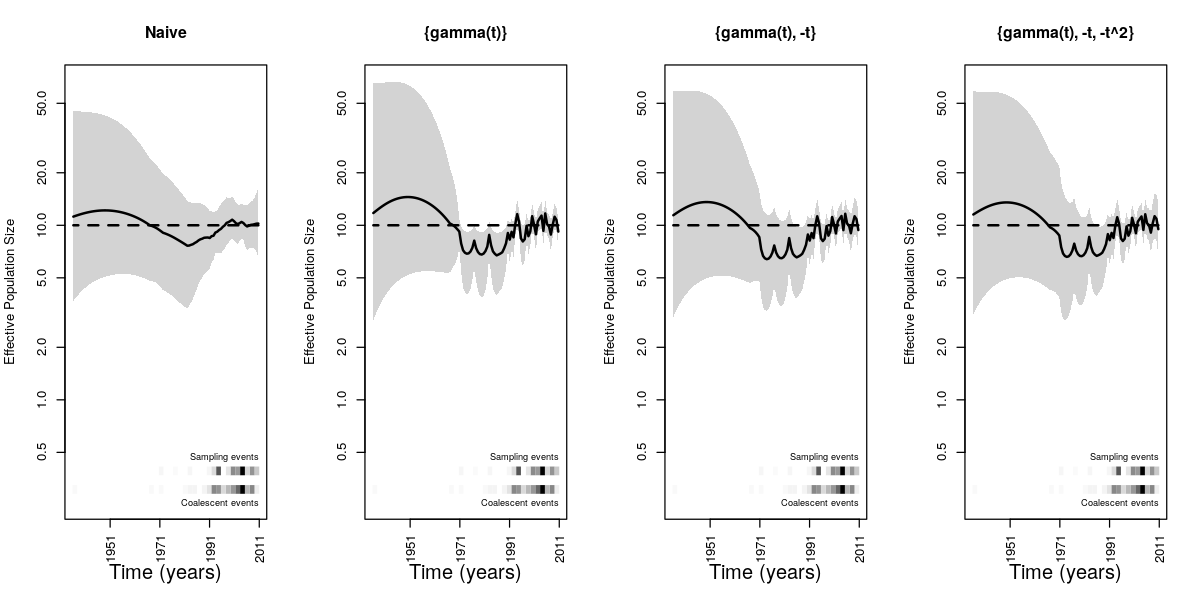

In [53]:
plot_reconstructions(reconstructions.O[[2]], times = tt.O)

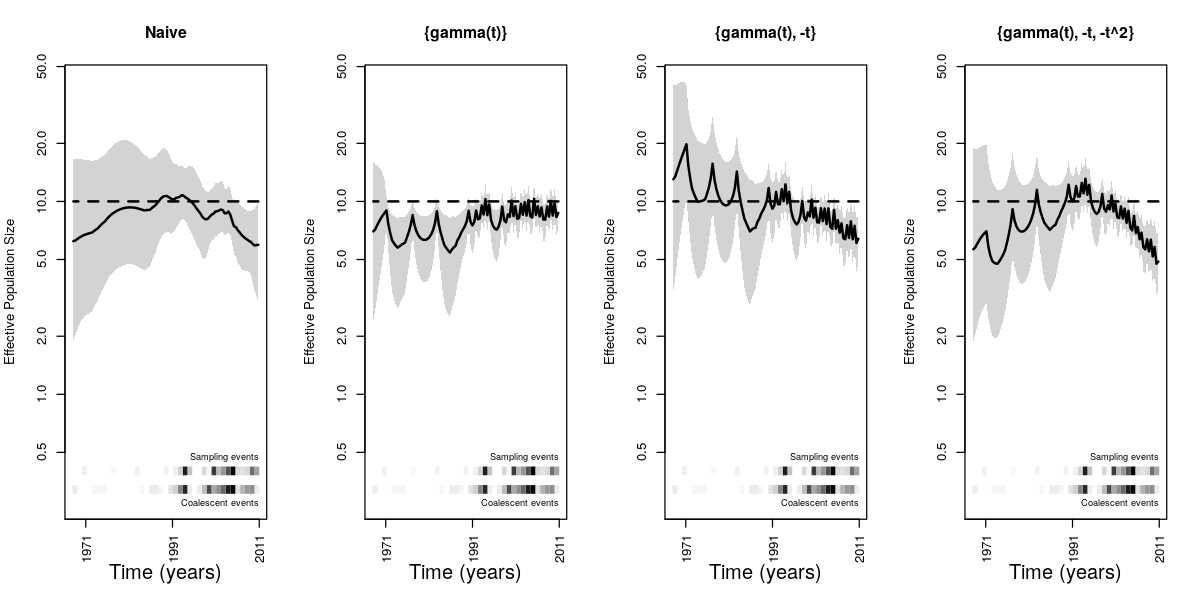

In [54]:
plot_reconstructions(reconstructions.O[[3]], times = tt.O)

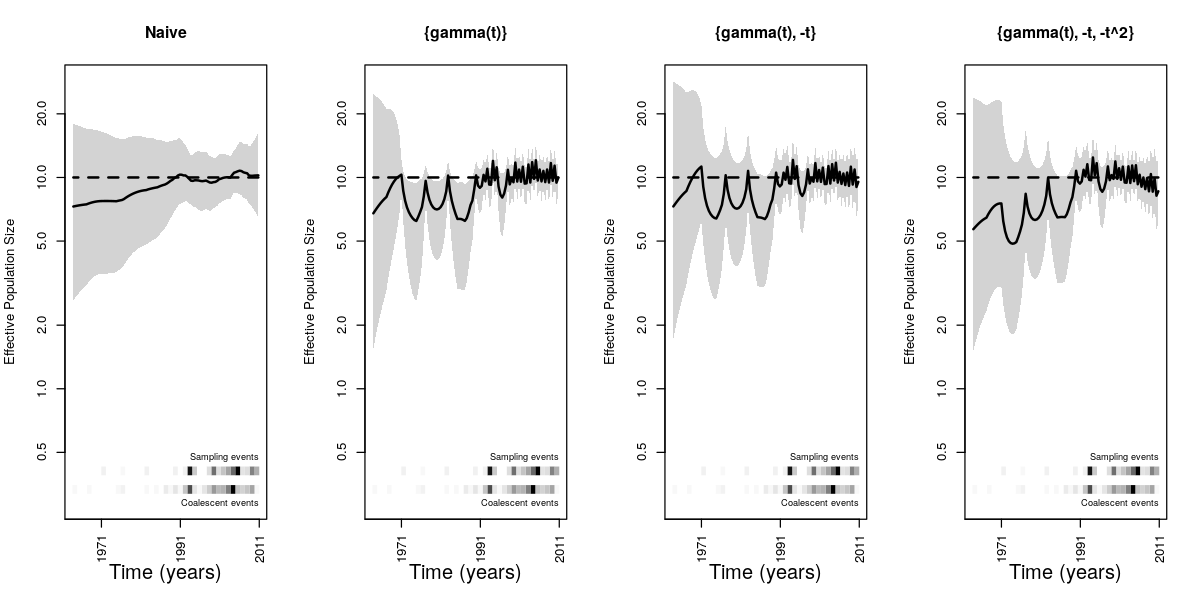

In [55]:
plot_reconstructions(reconstructions.O[[4]], times = tt.O)

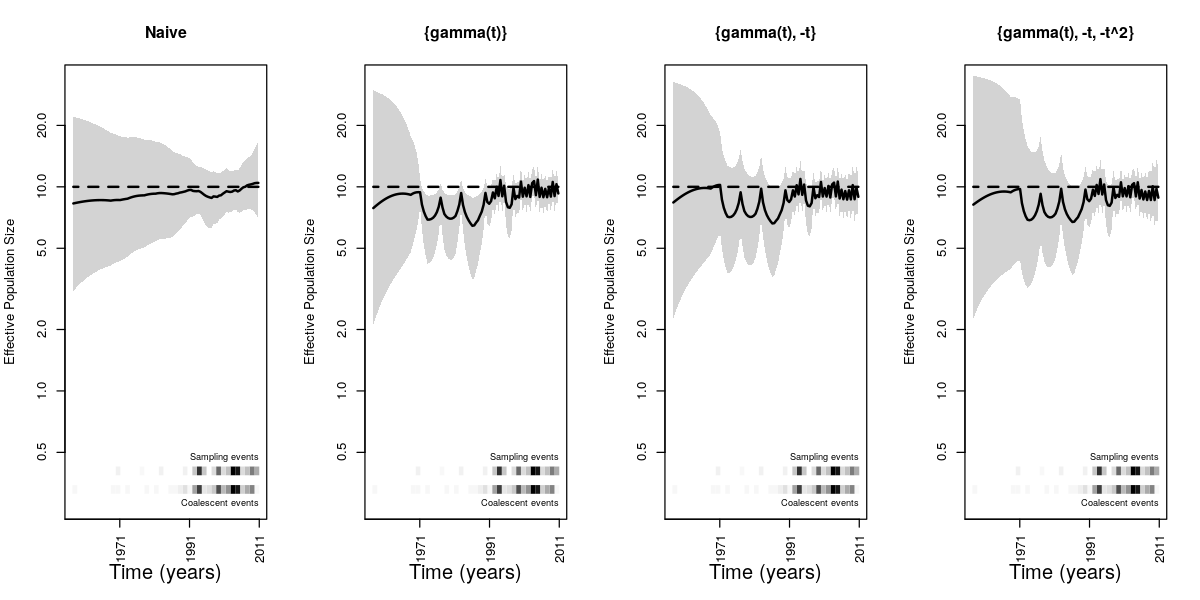

In [56]:
plot_reconstructions(reconstructions.O[[5]], times = tt.O)

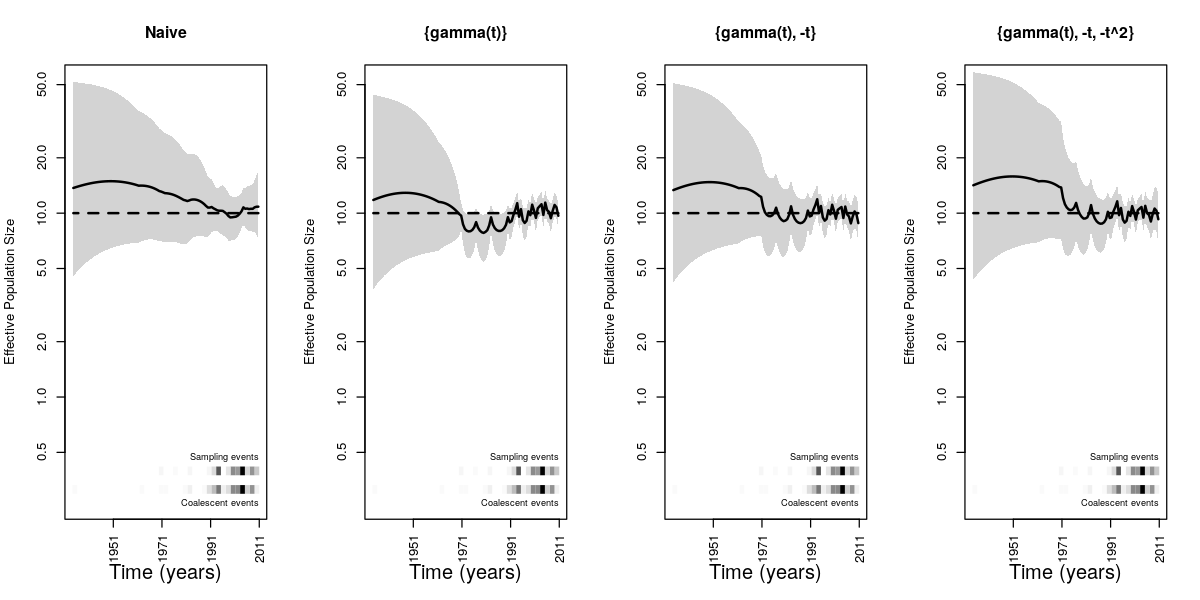

In [57]:
plot_reconstructions(reconstructions.O[[6]], times = tt.O)

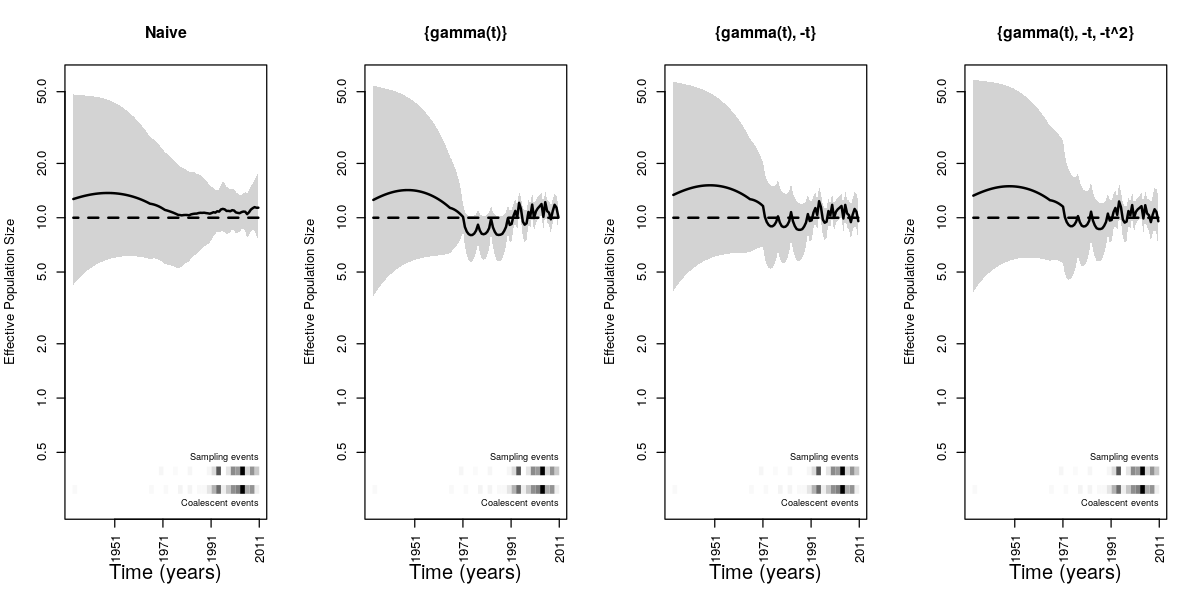

In [58]:
plot_reconstructions(reconstructions.O[[7]], times = tt.O)

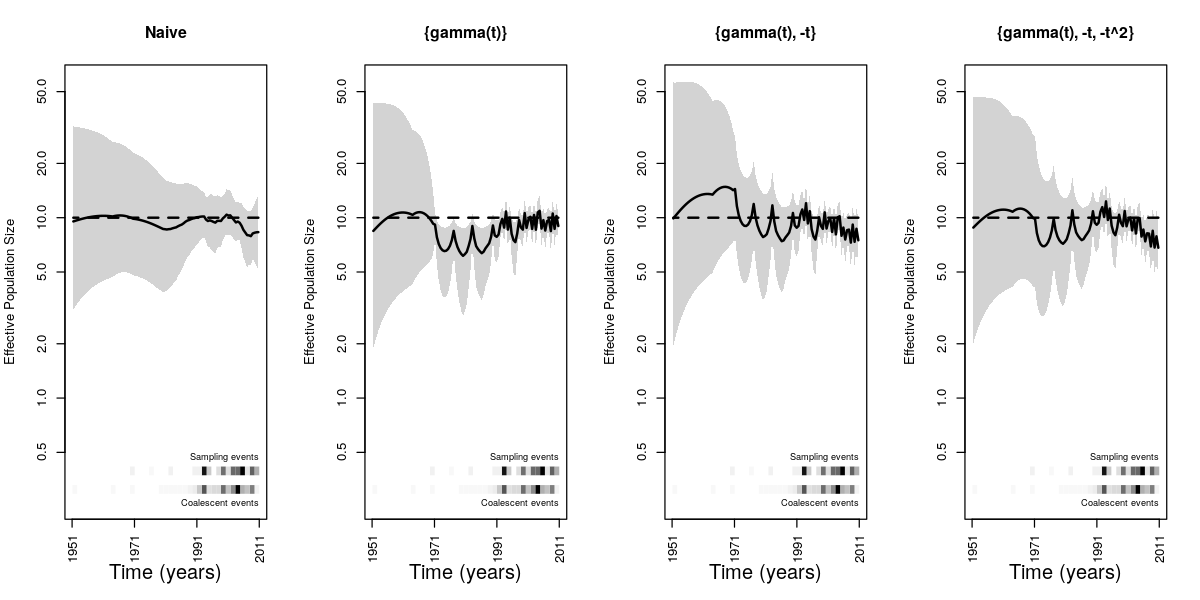

In [59]:
plot_reconstructions(reconstructions.O[[8]], times = tt.O)

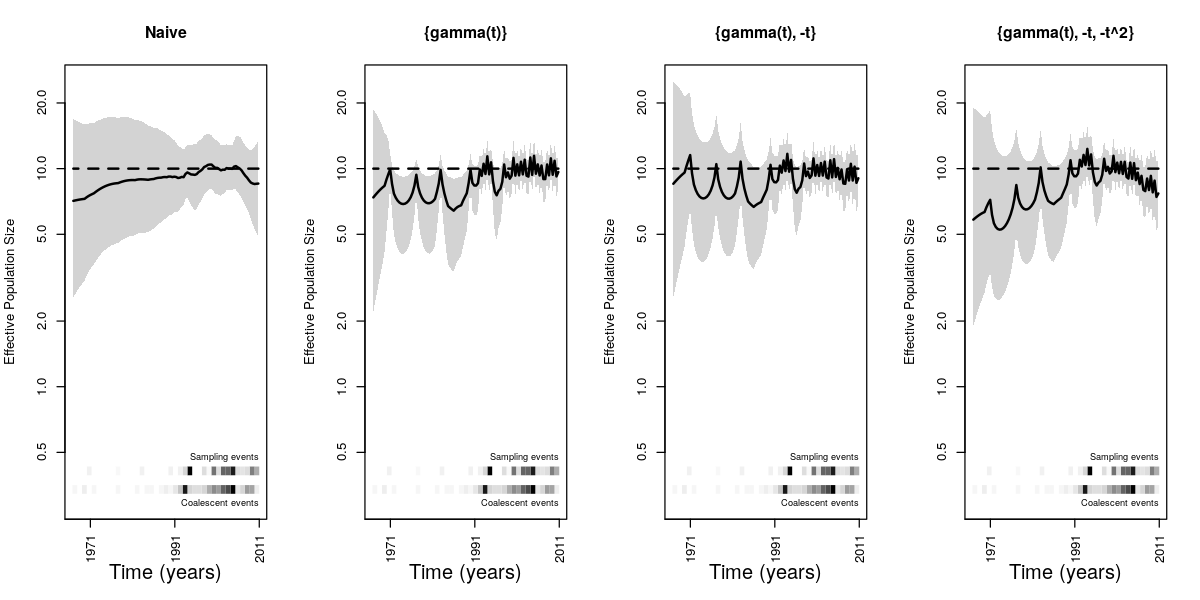

In [60]:
plot_reconstructions(reconstructions.O[[9]], times = tt.O)

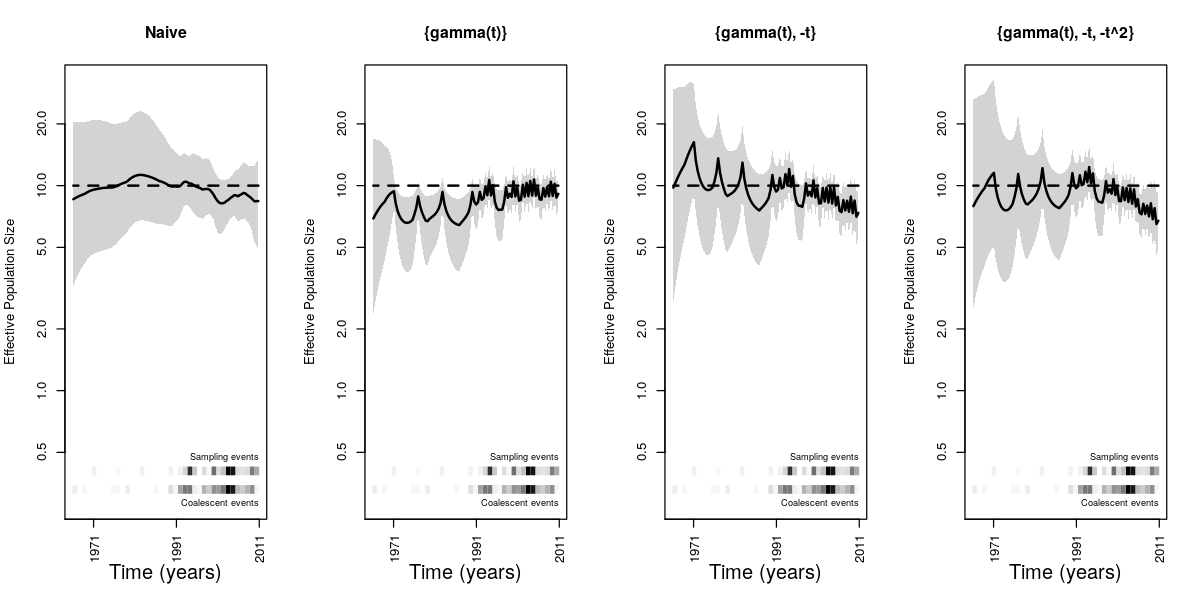

In [61]:
plot_reconstructions(reconstructions.O[[10]], times = tt.O)

## Now, marginal likelihoods

In [62]:
get_mal <- function(recon) data.frame( t( summary(recon$result)$mlik) )

In [63]:
make_mal_table <- function(mal.list) {
    K <- length(mal.list)
    Names <- names(mal.list)
    mals <- lapply(mal.list, get_mal)
    for(k in 1:K) mals[[k]]$model <- Names[k]
    do.call(rbind, mals)
}

In [79]:
Tables.A <- vector(nrep, mode = "list")
for (i in 1:nrep) Tables.A[[i]] <- data.frame(make_mal_table(reconstructions.A[[i]]), replicate = i)
BestModel.A <- lapply(Tables.A, function(x) {
    y <- subset(x, model != "naive")
    y[which.max(y$`log.marginal.likelihood..integration.`), ]
} )   

In [80]:
BestModel.A

,log.marginal.likelihood..integration.,log.marginal.likelihood..Gaussian.,model,replicate
preferential,-283.134,-283.3763,preferential,1
,log.marginal.likelihood..integration.,log.marginal.likelihood..Gaussian.,model,replicate
preferential,-255.0134,-257.058,preferential,2
,log.marginal.likelihood..integration.,log.marginal.likelihood..Gaussian.,model,replicate
preferential,-314.5601,-315.0436,preferential,3
,log.marginal.likelihood..integration.,log.marginal.likelihood..Gaussian.,model,replicate
preferential,-264.6924,-265.0881,preferential,4
,log.marginal.likelihood..integration.,log.marginal.likelihood..Gaussian.,model,replicate
preferential,-320.9106,-323.9972,preferential,5
,log.marginal.likelihood..integration.,log.marginal.likelihood..Gaussian.,model,replicate


In [66]:
MaLs.A <- do.call(rbind, Tables.A)

In [81]:
Tables.O <- vector(nrep, mode = "list")
for (i in 1:nrep) Tables.O[[i]] <- data.frame(make_mal_table(reconstructions.O[[i]]), replicate = i)
BestModel.O <- lapply(Tables.O, function(x) {
    y <- subset(x, model != "naive")
    y[which.max(y$`log.marginal.likelihood..integration.`), ]
})   

In [82]:
BestModel.O

,log.marginal.likelihood..integration.,log.marginal.likelihood..Gaussian.,model,replicate
preferential,-224.4017,-222.9615,preferential,1
,log.marginal.likelihood..integration.,log.marginal.likelihood..Gaussian.,model,replicate
preferential,-219.2298,-221.9372,preferential,2
,log.marginal.likelihood..integration.,log.marginal.likelihood..Gaussian.,model,replicate
preferential,-325.6297,-325.5312,preferential,3
,log.marginal.likelihood..integration.,log.marginal.likelihood..Gaussian.,model,replicate
preferential,-302.4328,-305.4425,preferential,4
,log.marginal.likelihood..integration.,log.marginal.likelihood..Gaussian.,model,replicate
preferential,-283.798,-286.9007,preferential,5
,log.marginal.likelihood..integration.,log.marginal.likelihood..Gaussian.,model,replicate


In [69]:
MaLs.O <- do.call(rbind, Tables.O)

In [70]:
MaLs.A$serotype <- "A"
MaLs.O$serotype <- "O"
MaLs <- rbind(MaLs.A, MaLs.O)

In [71]:
library(ggplot2)

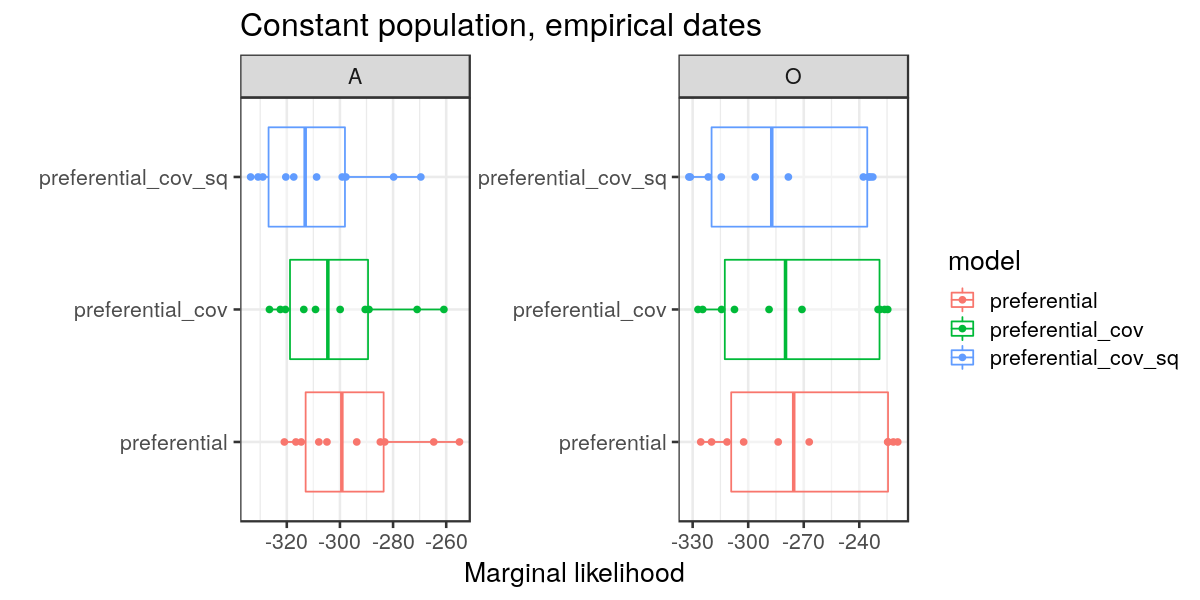

In [74]:
p <- ggplot(data = subset(MaLs, model != "naive"),
       aes(x = model, y = log.marginal.likelihood..integration., colour = model)) +
       geom_boxplot(alpha = .4) +
       geom_point() + 
       theme_bw(base_size = 16) +
       facet_wrap(~serotype, scales = "free") +
       coord_flip() +
       scale_y_continuous("Marginal likelihood") +
       scale_x_discrete("") +
       ggtitle("Constant population, empirical dates")
p

In [85]:
ggsave(plot = p, filename = "../../FIGURES/PLOTS/BNPR_simulations_scenario_A.pdf", width = 10, height = 5)